In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler 
import warnings
from sklearn.svm import SVC

In [5]:
iris  = pd.read_csv("Iris.csv")

In [6]:
print("Dataset Preview: ")
print(iris.head())

Dataset Preview: 
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
print("\nSummary of Dataset:")
print(iris.describe())


Summary of Dataset:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [8]:
print("Missing values")
print(iris.isnull().sum())

Missing values
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [13]:
label_encoder = LabelEncoder()
iris["species_encoded"] = label_encoder.fit_transform(iris['Species'])

In [16]:
print("\nEncoded Classes:")
print(label_encoder.classes_)


Encoded Classes:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [19]:
print(f"\nDataset Shape: {iris.shape}")

print("\nGrouped Mean By Species")
print(iris.groupby('Species').mean())


Dataset Shape: (150, 7)

Grouped Mean By Species
                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  species_encoded  
Species                                         
Iris-setosa             0.244              0.0  
Iris-versicolor         1.326              1.0  
Iris-virginica          2.026              2.0  


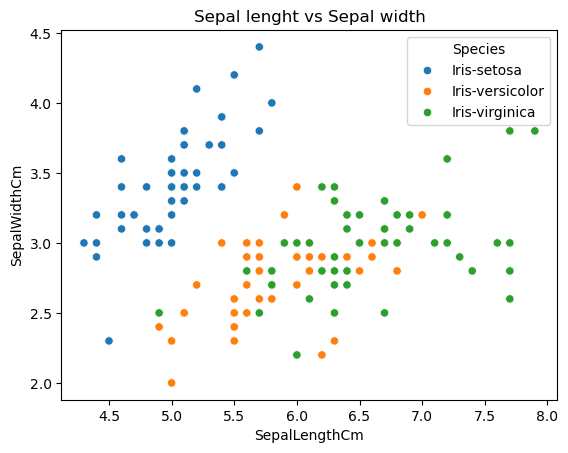

In [21]:
# Vsualizatons
# Scatter plot
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris)
plt.title('Sepal lenght vs Sepal width')
plt.show()

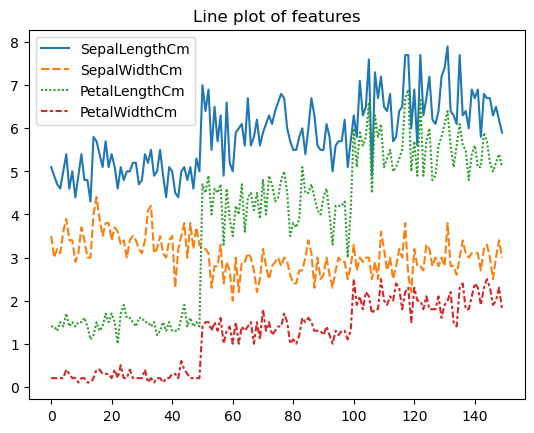

In [23]:
sns.lineplot(data=iris.drop(['Species', 'species_encoded', 'Id'], axis=1))
plt.title('Line plot of features')
plt.show()
    

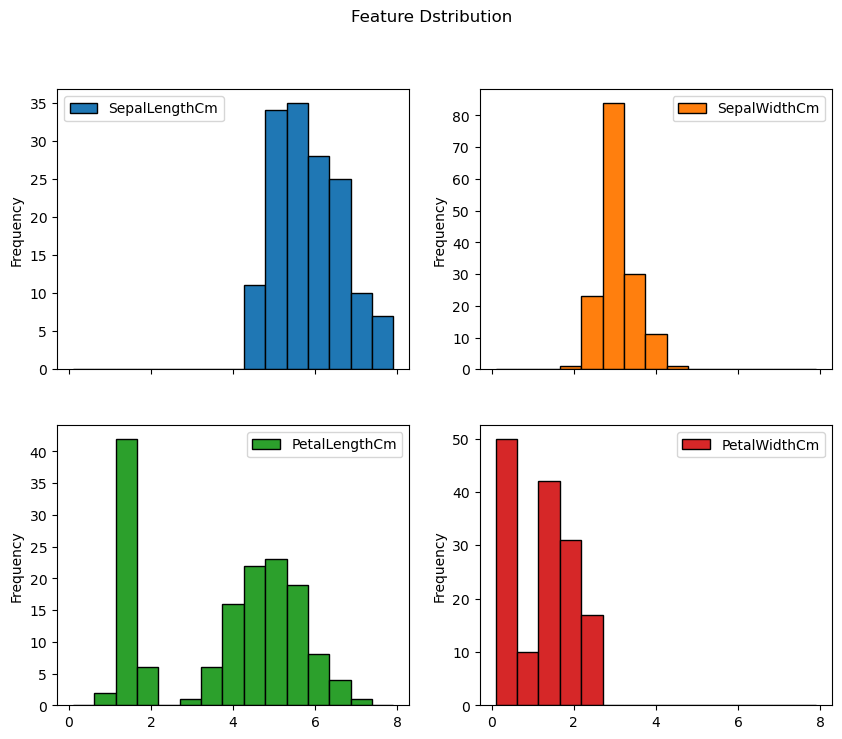

In [24]:
iris.drop(['Species', 'species_encoded', 'Id'], axis=1).plot.hist(subplots=True, layout=(2,2), figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle("Feature Dstribution")
plt.show()


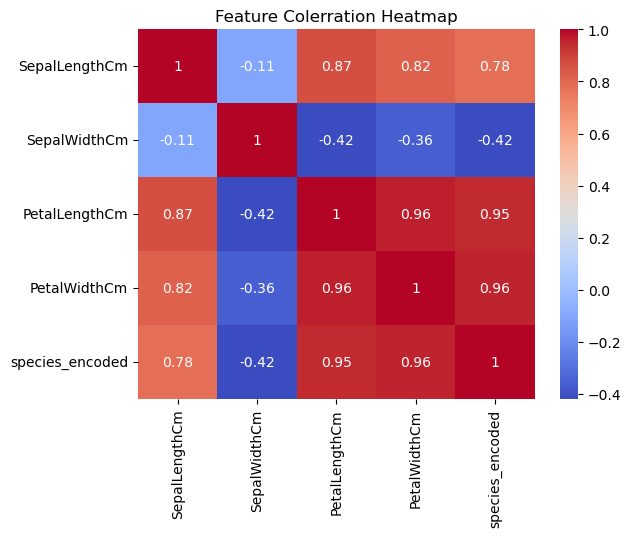

In [26]:
numeric_iris = iris.drop(['Species', 'Id'], axis=1)

sns.heatmap(numeric_iris.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Colerration Heatmap')
plt.show()

In [28]:
X = iris.drop(['Species', 'species_encoded', 'Id'], axis=1)
y = iris['species_encoded']


In [30]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

print(f"Training Set shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")
                                                    

Training Set shape: (90, 4)
Test Set Shape: (60, 4)


In [36]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm.fit(X_train, y_train)
y_predict_svm = svm.predict(X_test)

print("\nClassification Report:")
print(metrics.classification_report(y_test, y_predict_svm))
print(f"SVM Accuracy: {metrics.accuracy_score(y_test, y_predict_svm):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

SVM Accuracy: 0.9667
